# MATH 210 Project 2: Education completion rate in Dogwood,British

# April 2, 2017

  Education is more and more important in modern society.School completion rate should be paid more attention so that we can know the education level in details.
  we will study the school completion rate in Dogwood,British from 1997 to 2015 using the dataset
  [completionrate](https://catalogue.data.gov.bc.ca/dataset/bc-schools-six-year-completion-rate/resource/2640bc34-d559-499d-b8a8-5dd0a0cbd823)

# The questions we address are:

1.那种类型的学校的学业完成率最高？

2.what relationship between outmigrant and school completion?

3.which has higher completion rate?Female or male?

4.which district has highest completion rate? which has the lowest?



# Table of Contents:

Introducing the data

outmigrant and school completion

学校类型和学业完成率

female and male completion

districts completion rate

In [39]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)

# 1. Introducing the data


The dataset [completionrate](https://catalogue.data.gov.bc.ca/dataset/bc-schools-six-year-completion-rate/resource/2640bc34-d559-499d-b8a8-5dd0a0cbd823) available from the website https://data.gov.bc.ca/
It contains 1997-2016 Dogwood,BC school completion information and published in 2014,modified in 2016 with 20M size.
we will view the dataset using pandas.read_csv

## 1.1 data information

In [40]:
data = pd.read_csv('completionratehist20152016.csv')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166125 entries, 0 to 166124
Data columns (total 13 columns):
YEAR_6_OF_COHORT             166125 non-null object
DATA_LEVEL                   166125 non-null object
SUB_POPULATION               166125 non-null object
PUBLIC_OR_INDEPENDENT        166125 non-null object
DISTRICT_NUMBER              157905 non-null float64
DISTRICT_NAME                157905 non-null object
FACILITY_TYPE                166125 non-null object
COMPLETION_RATE_MODEL        166125 non-null object
MODEL_TYPE                   166125 non-null object
COHORT_COUNT                 166125 non-null object
SUCCESS_COUNT                166125 non-null object
ESTIMATED_OUTMIGRANTS        166125 non-null object
ESTIMATED_COMPLETION_RATE    166125 non-null object
dtypes: float64(1), object(12)
memory usage: 16.5+ MB


we will see that the dataset has 13 colomns and 166125 entries,but we don't use them all.
list the columns we used:
YEAR_6_OF_COHORT: time
SUB_POPULATION:number of people
DISTRICT_NAME:district name
FACILITY_TYPE:faculity type
COHORT_COUNT: person entered school
SUCCESS_COUNT: person graduated from school
ESTIMATED_OUTMIGRANTS: outmigrants
ESTIMATED_COMPLETION_RATE: completion rate

In [42]:
data.head()

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997/1998,DISTRICT LEVEL,ABORIGINAL,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,9,3.8,38.7
1,1997/1998,DISTRICT LEVEL,ABORIGINAL,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,9,4.1,39.3
2,1997/1998,DISTRICT LEVEL,ALL STUDENTS,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,465,84.5,79.4
3,1997/1998,DISTRICT LEVEL,ALL STUDENTS,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,470,86.1,80.5
4,1997/1998,DISTRICT LEVEL,ENGLISH LANGUAGE LEARNER,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,MSK,MSK,MSK,MSK


In [43]:
data['FACILITY_TYPE'].unique()

array(['ALL FACILITY TYPES', 'STANDARD'], dtype=object)

there are only two facility type named ALL FACILITY TYPES and STANDARD

we process the first column to one specified year to handle time.

## 1.2 data convert

-apply() 对每行数据应用函数

-drop()删除列或行

In [44]:
data['YEAR_6_OF_COHORT'] = data['YEAR_6_OF_COHORT'].apply(lambda year: year[:4])
data.head()

,YEAR_6_OF_COHORT,DATA_LEVEL,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NUMBER,DISTRICT_NAME,FACILITY_TYPE,COMPLETION_RATE_MODEL,MODEL_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
0,1997,DISTRICT LEVEL,ABORIGINAL,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,9,3.8,38.7
1,1997,DISTRICT LEVEL,ABORIGINAL,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,27,9,4.1,39.3
2,1997,DISTRICT LEVEL,ALL STUDENTS,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,465,84.5,79.4
3,1997,DISTRICT LEVEL,ALL STUDENTS,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_8_YEAR EXTENDED_MODEL,DYNAMIC MODEL,670,470,86.1,80.5
4,1997,DISTRICT LEVEL,ENGLISH LANGUAGE LEARNER,BC Public School,5.0,Southeast Kootenay,ALL FACILITY TYPES,GRAD_7_YEAR EXTENDED_MODEL,DYNAMIC MODEL,MSK,MSK,MSK,MSK


we use drop function to delete those columns we won't use in the future.
There are some columns contains null value and we should filter these rows.

In [45]:
data = data.drop(['DATA_LEVEL','DISTRICT_NUMBER','COMPLETION_RATE_MODEL','MODEL_TYPE'],axis = 1)
data = data[data['ESTIMATED_COMPLETION_RATE'] != 'MSK']       

# 2. study the relationship between outmigrants and completion rate

-apply()应用函数到每行

-sum()求和

-plot（） 画图

## 2.1 caculate outmigrants 

In [46]:
data['ESTIMATED_OUTMIGRANTS'] = data['ESTIMATED_OUTMIGRANTS'].apply(float)
year_migrants = data.groupby(['YEAR_6_OF_COHORT']).sum()
year_migrants

,ESTIMATED_OUTMIGRANTS
YEAR_6_OF_COHORT,
1997,292664.6
1998,313011.0
1999,1016225.2
2000,1084651.5
2001,1098447.0
2002,1115977.7
2003,1085151.1
2004,1007415.5
2005,1014338.7


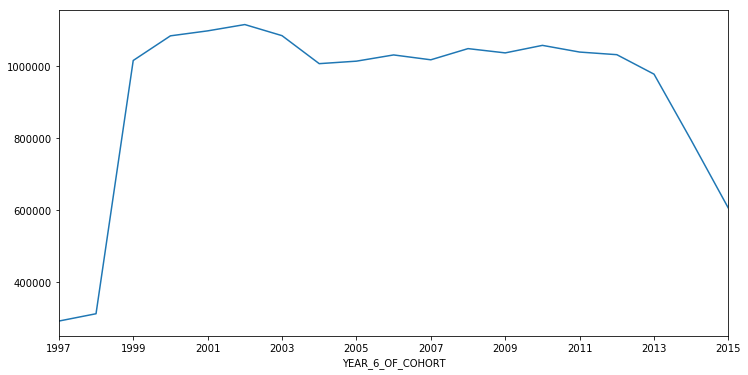

In [47]:
year_migrants['ESTIMATED_OUTMIGRANTS'].plot()

from above figure,we can get the information that outmigrants sharply inccreased in 1988 and made a big down step in 2013.

## 2.2 学业完成率随时间的变化

把ESTIMATED_COMPLETION_RATE这一列的数值类型转换为float

In [48]:
data['ESTIMATED_COMPLETION_RATE'] = data['ESTIMATED_COMPLETION_RATE'].apply(float)

先按时间分类，最后求平均值，这是每年的平均完成率

In [49]:
year_rate = data.groupby(['YEAR_6_OF_COHORT']).mean()
year_rate

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,
1997,148.034699,69.034143
1998,150.848675,70.523325
1999,119.569973,78.465549
2000,124.429448,79.706275
2001,125.065126,80.092474
2002,126.113425,81.173929
2003,120.225028,81.047020
2004,111.156957,81.446828
2005,111.184775,81.971961


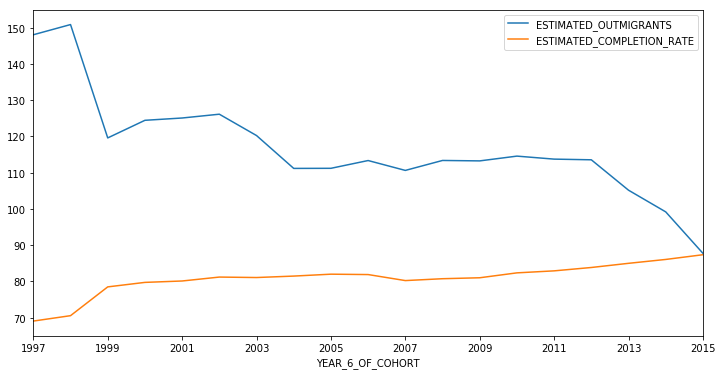

In [50]:
year_rate.plot()

from above figure,we find that completion rate rising while outmigrants down,especially in 1998-1999.Perhaps,with time went by,the aera education level was made geat process and people graduated from school more easily,this situstion void people move away.

# 3. school type and completion rate

使用unique()函数去掉重复值

In [51]:
data['PUBLIC_OR_INDEPENDENT'].unique()

array(['BC Public School', 'BC Independent School', 'PROVINCE - Total'], dtype=object)

## 3.1 school type.

In [52]:
independent_school = data[data['PUBLIC_OR_INDEPENDENT'] == 'BC Independent School'].groupby(['YEAR_6_OF_COHORT']).count()
independent_school

,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NAME,FACILITY_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,,,,,,,
1997,36,36,0,36,36,36,36,36
1998,36,36,0,36,36,36,36,36
1999,160,160,0,160,160,160,160,160
2000,160,160,0,160,160,160,160,160
2001,160,160,0,160,160,160,160,160
2002,160,160,0,160,160,160,160,160
2003,160,160,0,160,160,160,160,160
2004,160,160,0,160,160,160,160,160
2005,160,160,0,160,160,160,160,160


In [53]:
public_school = data[data['PUBLIC_OR_INDEPENDENT'] == 'BC Public School'].groupby(['YEAR_6_OF_COHORT']).count()
public_school

,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NAME,FACILITY_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,,,,,,,
1997,1901,1901,1861,1901,1901,1901,1901,1901
1998,1999,1999,1959,1999,1999,1999,1999,1999
1999,8179,8179,8019,8179,8179,8179,8179,8179
2000,8397,8397,8237,8397,8397,8397,8397,8397
2001,8463,8463,8303,8463,8463,8463,8463,8463
2002,8529,8529,8369,8529,8529,8529,8529,8529
2003,8706,8706,8546,8706,8706,8706,8706,8706
2004,8743,8743,8583,8743,8743,8743,8743,8743
2005,8803,8803,8643,8803,8803,8803,8803,8803


In [54]:
province_school= data[data['PUBLIC_OR_INDEPENDENT'] == 'PROVINCE - Total'].groupby(['YEAR_6_OF_COHORT']).count()
province_school

,SUB_POPULATION,PUBLIC_OR_INDEPENDENT,DISTRICT_NAME,FACILITY_TYPE,COHORT_COUNT,SUCCESS_COUNT,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,,,,,,,
1997,40,40,0,40,40,40,40,40
1998,40,40,0,40,40,40,40,40
1999,160,160,0,160,160,160,160,160
2000,160,160,0,160,160,160,160,160
2001,160,160,0,160,160,160,160,160
2002,160,160,0,160,160,160,160,160
2003,160,160,0,160,160,160,160,160
2004,160,160,0,160,160,160,160,160
2005,160,160,0,160,160,160,160,160


从上面的分析可以看出共有3种学校类型，其中公立学校数量最多

## 3.2 public school completion rate

In [55]:
public_school_rate = data[data['PUBLIC_OR_INDEPENDENT'] == 'BC Public School'].groupby(['YEAR_6_OF_COHORT']).mean()
public_school_rate

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,
1997,98.073277,68.831299
1998,99.576888,70.346123
1999,78.803448,78.423059
2000,81.930797,79.674896
2001,82.359861,80.037103
2002,82.893962,81.138645
2003,78.735654,80.976867
2004,72.595265,81.405010
2005,72.405941,81.910406


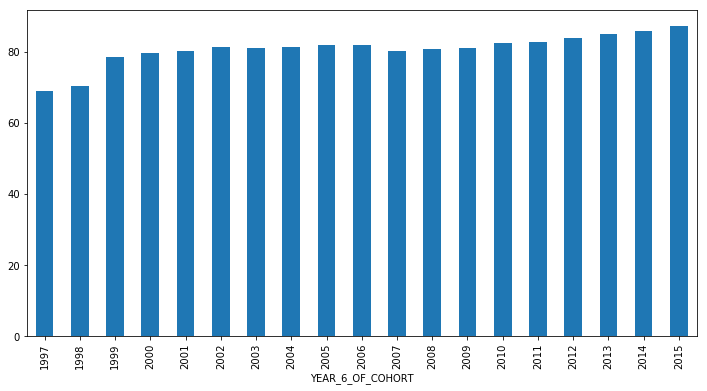

In [56]:
public_school_rate['ESTIMATED_COMPLETION_RATE'].plot(kind = 'bar')

## 3.3 independent school completionrate

In [57]:
independent_school_rate = data[data['PUBLIC_OR_INDEPENDENT'] == 'BC Independent School'].groupby(['YEAR_6_OF_COHORT']).mean()
independent_school_rate

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,
1997,179.244444,78.322222
1998,199.244444,79.661111
1999,153.557500,79.946250
2000,164.046250,80.306250
2001,164.821250,82.060000
2002,172.669375,81.699375
2003,177.410000,83.166250
2004,172.429375,81.913125
2005,181.540000,83.648750


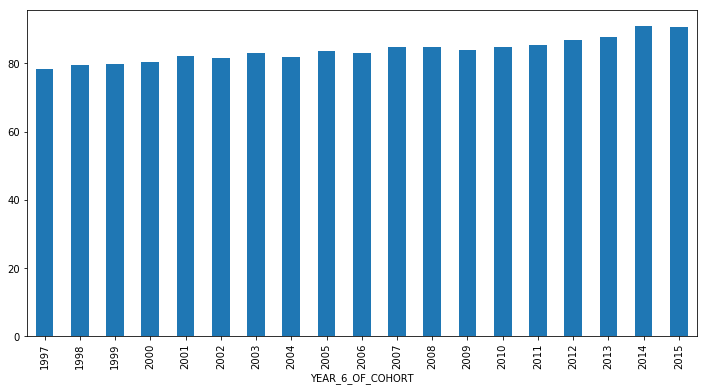

In [58]:
independent_school_rate['ESTIMATED_COMPLETION_RATE'].plot(kind = 'bar')

## 3.4 province school completion rate

In [59]:
province_school_rate = data[data['PUBLIC_OR_INDEPENDENT'] == 'PROVINCE - Total'].groupby(['YEAR_6_OF_COHORT']).mean()
province_school_rate


,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,
1997,2494.362500,70.315000
1998,2669.600000,71.155000
1999,2169.516250,79.156875
2000,2315.195000,80.753125
2001,2344.150625,81.053750
2002,2383.425000,82.529375
2003,2320.580625,82.745000
2004,2157.040000,83.265625
2005,2174.392500,83.681875


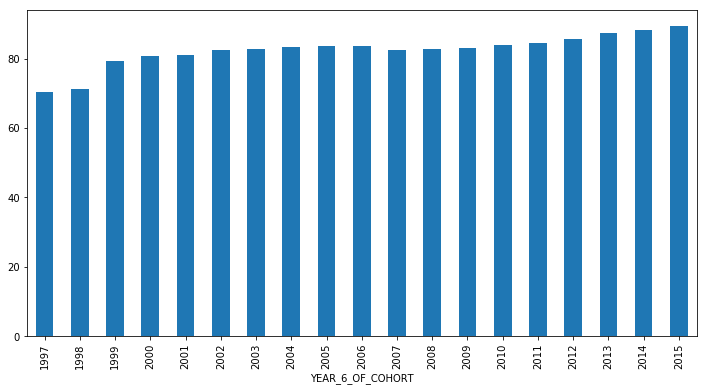

In [60]:
province_school_rate['ESTIMATED_COMPLETION_RATE'].plot(kind = 'bar')

## 3.5 plot all school type 

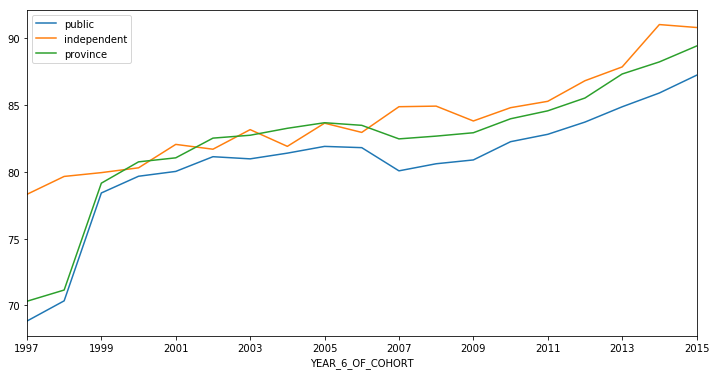

In [61]:
public_school_rate['ESTIMATED_COMPLETION_RATE'].plot()
independent_school_rate['ESTIMATED_COMPLETION_RATE'].plot()
province_school_rate['ESTIMATED_COMPLETION_RATE'].plot()
plt.legend(['public','independent','province'])

 各个类型的学校完成率都随逐年增加，independent school从2009年开始居于第一位

# 4. Female and male compeletation rate 

## 4.1 display all sub_population completion rate

In [62]:
year_population = data.groupby(['SUB_POPULATION']).mean()
year_population

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
SUB_POPULATION,,
ABORIGINAL,19.791875,72.267205
ALL STUDENTS,200.797258,86.395287
ENGLISH LANGUAGE LEARNER,67.134748,81.483803
FEMALE,98.659690,88.636466
MALE,104.202870,84.498357
NON ABORIGINAL,188.866268,89.607826
NON ENGLISH LANGUAGE LEARNER,151.885036,87.233665
NON RESIDENT,35.515392,50.783503
RESIDENT,186.131420,87.517641


从上面的分析可以看出人口由10个部分组成，其中学生的迁出人数最多

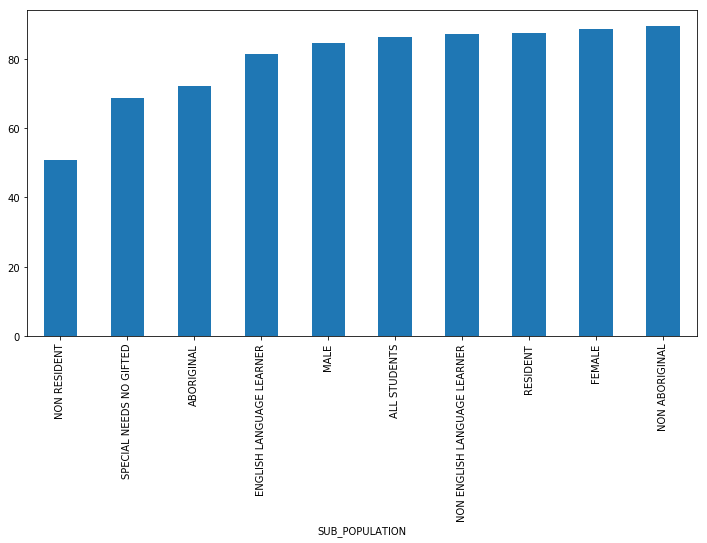

In [63]:
year_population = year_population.sort_values(['ESTIMATED_COMPLETION_RATE'])
year_population['ESTIMATED_COMPLETION_RATE'].plot(kind='bar')

## 4.2 female completion rate

In [64]:
year_people = data[data['SUB_POPULATION'] == 'FEMALE']
year_female_rate = year_people.groupby(['YEAR_6_OF_COHORT']).mean()
year_female_rate

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,
1997,116.303279,77.985246
1998,120.072222,80.378968
1999,96.937177,86.602485
2000,101.902778,87.856349
2001,103.106349,87.566567
2002,104.688095,88.448016
2003,101.873909,88.937897
2004,94.498303,89.314970
2005,95.280754,89.046528


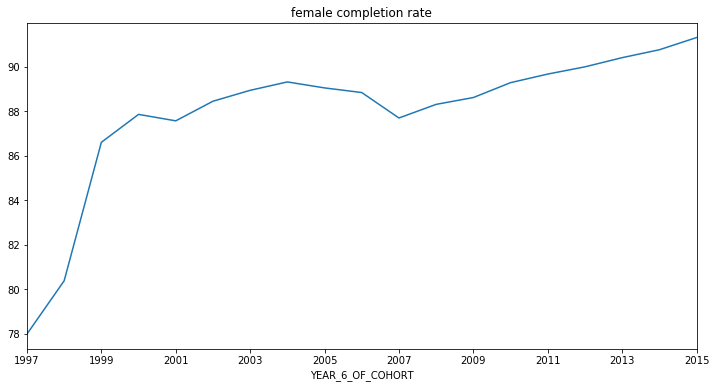

In [65]:
year_female_rate['ESTIMATED_COMPLETION_RATE'].plot()
plt.title('female completion rate')

从上图可以看出，女性的学业完成率逐年增长，其中1998年的增速最大，到2015年，完成率高达90%以上。

## 4.3 male completion rate

In [66]:
year_people = data[data['SUB_POPULATION'] == 'MALE']
year_people_rate = year_people.groupby(['YEAR_6_OF_COHORT']).mean()
year_people_rate

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
YEAR_6_OF_COHORT,,
1997,119.144444,70.291667
1998,127.208730,73.737698
1999,103.236779,80.742048
2000,110.691100,81.246800
2001,110.379464,82.727579
2002,112.216998,83.761928
2003,108.621825,83.584127
2004,103.414676,84.502227
2005,101.578330,84.886879


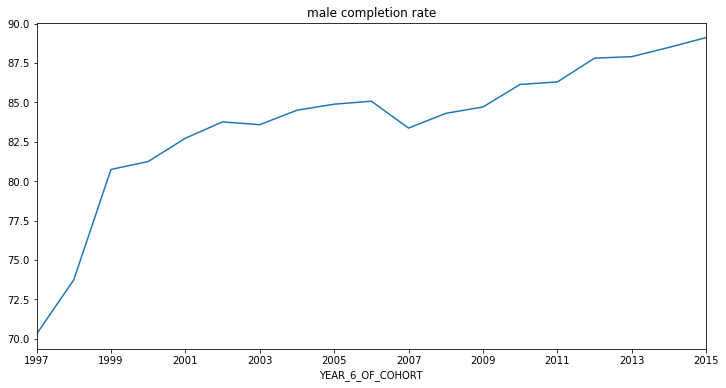

In [67]:
year_people_rate['ESTIMATED_COMPLETION_RATE'].plot()
plt.title('male completion rate')

plot male and female completion rate from year to year,we can see that female completion rate always higher than male.

# 5.districts completion rate

we use groupby function to group this dataset by one column

we use count function to count the number of rows

we use sort_value function to sort result.

## 5.1 统计地区个数

In [68]:
districts = data['DISTRICT_NAME'].unique()
districts

array(['Southeast Kootenay', 'Rocky Mountain', 'Kootenay Lake',
       'Arrow Lakes', 'Revelstoke', 'Kootenay-Columbia', 'Vernon',
       'Central Okanagan', 'Cariboo-Chilcotin', 'Quesnel', 'Chilliwack',
       'Abbotsford', 'Langley', 'Surrey', 'Delta', 'Richmond', 'Vancouver',
       'New Westminster', 'Burnaby', 'Maple Ridge-Pitt Meadows',
       'Coquitlam', 'North Vancouver', 'West Vancouver', 'Sunshine Coast',
       'Powell River', 'Sea to Sky', 'Central Coast', 'Haida Gwaii',
       'Boundary', 'Prince Rupert', 'Okanagan Similkameen',
       'Bulkley Valley', 'Prince George', 'Nicola-Similkameen',
       'Peace River South', 'Peace River North', 'Greater Victoria',
       'Sooke', 'Saanich', 'Gulf Islands', 'Okanagan Skaha',
       'Nanaimo-Ladysmith', 'Qualicum', 'Alberni', 'Comox Valley',
       'Campbell River', 'Kamloops/Thompson', 'Gold Trail', 'Mission',
       'Fraser-Cascade', 'Cowichan Valley', 'Fort Nelson',
       'Coast Mountains', 'North Okanagan-Shuswap',
       '

In [69]:
len(districts)

61

该省共有61个区

## 5.2 last 10 districts

In [70]:
district_rate = data.groupby(['DISTRICT_NAME']).mean()
district_rate = district_rate.sort_values(['ESTIMATED_COMPLETION_RATE'])
district_rate

,ESTIMATED_OUTMIGRANTS,ESTIMATED_COMPLETION_RATE
DISTRICT_NAME,,
Stikine,3.006368,60.818537
Nisga'a,0.871494,67.024207
Central Coast,1.556827,71.886216
Haida Gwaii,3.464226,73.015958
Gold Trail,5.824517,74.559950
Vancouver Island West,1.843836,75.392088
Cowichan Valley,23.543631,75.690999
Alberni,9.793375,77.079375
Nanaimo-Ladysmith,48.335542,77.265964


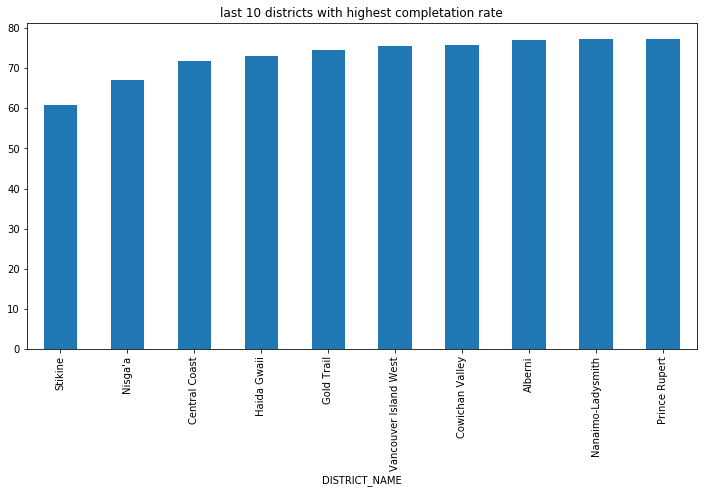

In [71]:
district_rate['ESTIMATED_COMPLETION_RATE'][:10].plot(kind = 'bar')
plt.title('last 10 districts with highest completation rate')

we can see that Stikine has lowest average completion rate

## 5.3 top 10 districts

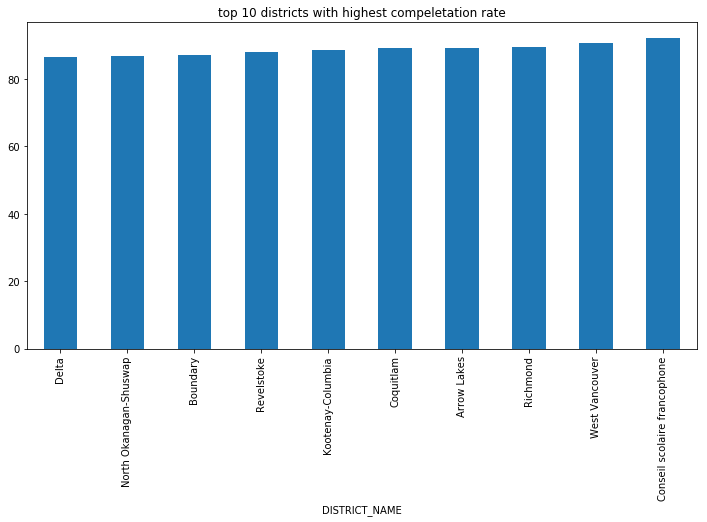

In [72]:
district_rate['ESTIMATED_COMPLETION_RATE'][-10:].plot(kind = 'bar')
plt.title('top 10 districts with highest compeletation rate')

we can see that Conseil scolalre francophone has highest completion rate.

引用：[pandas documention](https://pypi.python.org/pypi/pandas/)

[matplotlib documention](http://matplotlib.org/)

[completion rate](https://catalogue.data.gov.bc.ca/dataset/bc-schools-six-year-completion-rate/resource/2640bc34-d559-499d-b8a8-5dd0a0cbd823)
